In [2]:
from sys import platform as _platform
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#if _platform =='linux2':
#    path = '../data/data_sleep/' 
#else:
#    #mets ton path ici et ça devrait marcher :)
#    path = ""
path = "./data/"

In [5]:
frequencies=pd.read_csv(path+"data_frequences.csv").drop("Unnamed: 0", axis=1)
#frequencies=pd.read_csv(path+"fft_eeg.csv")
frequencies_acc =pd.read_csv(path+"fft_acc.csv")

stats=pd.read_csv(path+"data_stat_feats.csv").drop("Unnamed: 0", axis=1)
labels=pd.read_csv(path+"challenge_output_data_training_file_sleep_stages_classification.csv", sep=";")

In [6]:
acc_x_cols = [col for col in frequencies_acc.columns if 'ACC_X' in col]
acc_y_cols = [col for col in frequencies_acc.columns if 'ACC_Y' in col]
acc_z_cols = [col for col in frequencies_acc.columns if 'ACC_Z' in col]

In [7]:
acc_x=frequencies_acc[acc_x_cols].drop("ACC_X.freq0.0",axis=1)
acc_y=frequencies_acc[acc_y_cols].drop("ACC_Y.freq0.0",axis=1)
acc_z=frequencies_acc[acc_z_cols].drop("ACC_Z.freq0.0",axis=1)

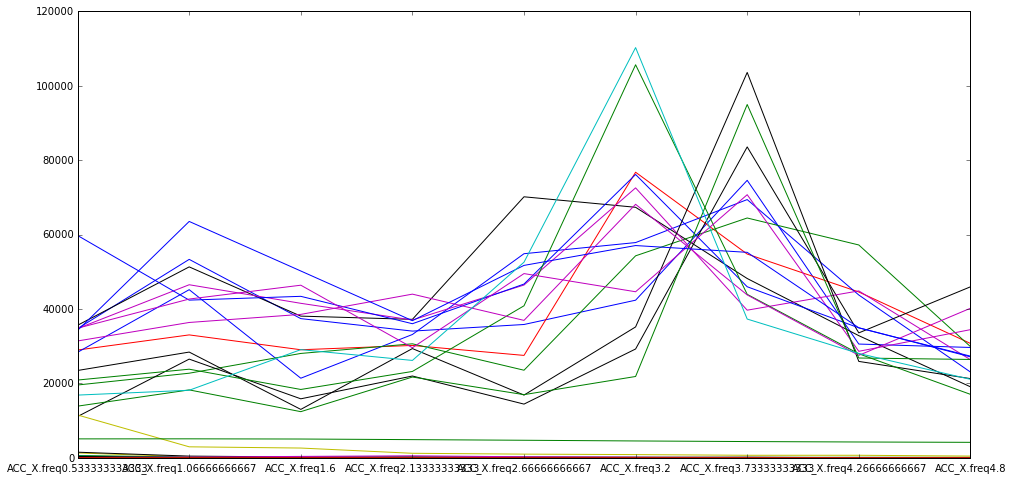

In [142]:
pd.rolling_mean(acc_x.loc[:100].T,8).dropna()[::8].plot(legend=False, figsize=(16,8))

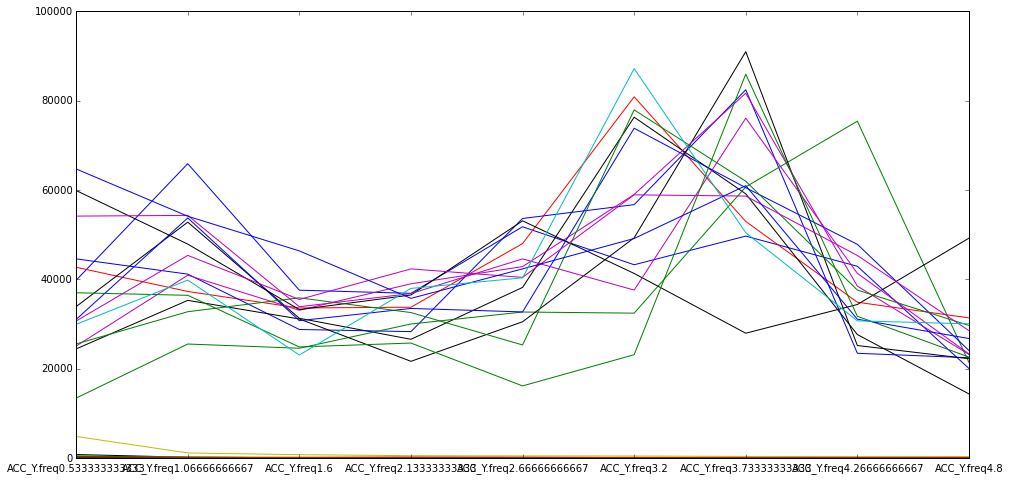

In [144]:
pd.rolling_mean(acc_y.loc[:100].T,8).dropna()[::8].plot(legend=False, figsize=(16,8))

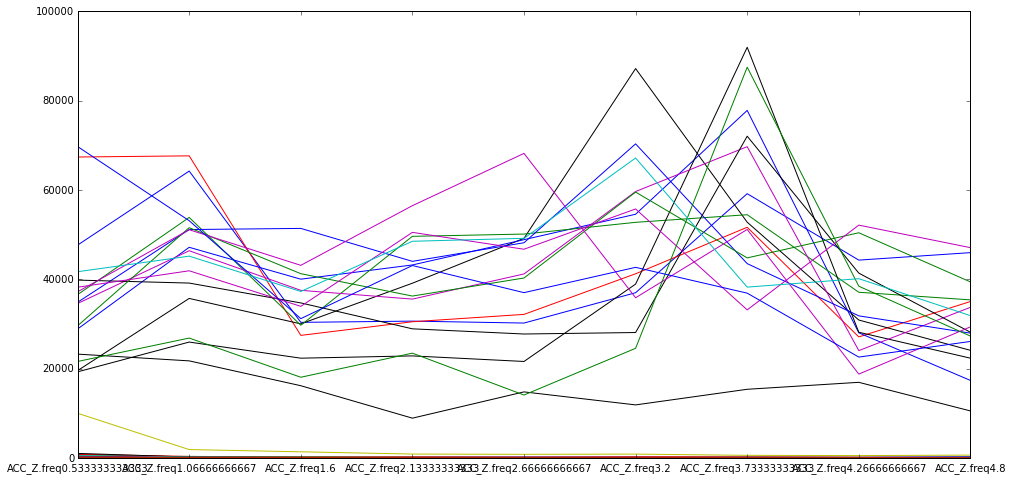

In [145]:
pd.rolling_mean(acc_z.loc[:100].T,8).dropna()[::8].plot(legend=False, figsize=(16,8))

In [8]:
rolling_acc_x = pd.rolling_mean(acc_x.T,8).dropna()[::8].T
rolling_acc_y = pd.rolling_mean(acc_y.T,8).dropna()[::8].T
rolling_acc_z = pd.rolling_mean(acc_z.T,8).dropna()[::8].T

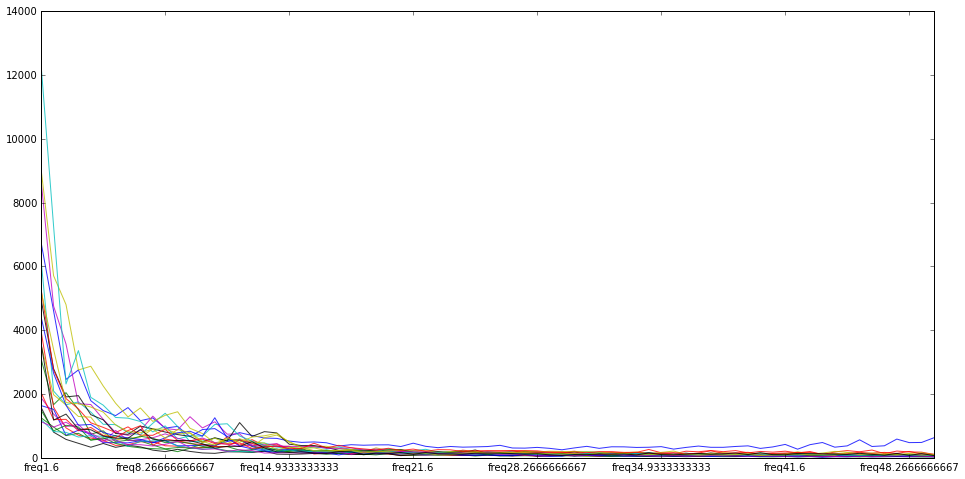

In [32]:
pd.rolling_mean(frequencies.loc[:20].T, 10).dropna()[::10].plot(legend=False, figsize=(16,8), alpha=0.8)

In [39]:
rolling_eeg=pd.rolling_mean(frequencies.T, 10).dropna()[::10].T

In [40]:
train = pd.concat([rolling_eeg, rolling_acc_x, rolling_acc_y, rolling_acc_z, stats, frequencies_acc], axis=1).drop(["skew_ACC_Z","skew_ACC_Y","skew_ACC_X"], axis=1)

In [41]:
train.describe()

,freq1.6,freq2.26666666667,freq2.93333333333,freq3.6,freq4.26666666667,freq4.93333333333,freq5.6,freq6.26666666667,freq6.93333333333,freq7.6,freq8.26666666667,freq8.93333333333,freq9.6,freq10.2666666667,freq10.9333333333,freq11.6,freq12.2666666667,freq12.9333333333,freq13.6,freq14.2666666667,freq14.9333333333,freq15.6,freq16.2666666667,freq16.9333333333,freq17.6,freq18.2666666667,freq18.9333333333,freq19.6,freq20.2666666667,freq20.9333333333,freq21.6,freq22.2666666667,freq22.9333333333,freq23.6,freq24.2666666667,freq24.9333333333,freq25.6,freq26.2666666667,freq26.9333333333,freq27.6,freq28.2666666667,freq28.9333333333,freq29.6,freq30.2666666667,freq30.9333333333,freq31.6,freq32.2666666667,freq32.9333333333,freq33.6,freq34.2666666667,freq34.9333333333,freq35.6,freq36.2666666667,freq36.9333333333,freq37.6,freq38.2666666667,freq38.9333333333,freq39.6,freq40.2666666667,freq40.9333333333,freq41.6,freq42.2666666667,freq42.9333333333,freq43.6,freq44.2666666667,freq44.9333333333,freq45.6,freq46.2666666667,freq46.9333333333,freq47.6,freq48.2666666667,freq48.9333333333,freq49.6,ACC_X.freq0.533333333333,ACC_X.freq1.06666666667,ACC_X.freq1.6,ACC_X.freq2.13333333333,ACC_X.freq2.66666666667,ACC_X.freq3.2,ACC_X.freq3.73333333333,ACC_X.freq4.26666666667,ACC_X.freq4.8,ACC_Y.freq0.533333333333,ACC_Y.freq1.06666666667,ACC_Y.freq1.6,ACC_Y.freq2.13333333333,ACC_Y.freq2.66666666667,ACC_Y.freq3.2,ACC_Y.freq3.73333333333,ACC_Y.freq4.26666666667,ACC_Y.freq4.8,ACC_Z.freq0.533333333333,ACC_Z.freq1.06666666667,ACC_Z.freq1.6,ACC_Z.freq2.13333333333,ACC_Z.freq2.66666666667,ACC_Z.freq3.2,ACC_Z.freq3.73333333333,ACC_Z.freq4.26666666667,ACC_Z.freq4.8,0_quantile_EEG,10_quantile_EEG,20_quantile_EEG,30_quantile_EEG,40_quantile_EEG,50_quantile_EEG,60_quantile_EEG,70_quantile_EEG,80_quantile_EEG,90_quantile_EEG,100_quantile_EEG,0_quantile_ACC_Z,10_quantile_ACC_Z,20_quantile_ACC_Z,30_quantile_ACC_Z,40_quantile_ACC_Z,50_quantile_ACC_Z,60_quantile_ACC_Z,70_quantile_ACC_Z,80_quantile_ACC_Z,90_quantile_ACC_Z,100_quantile_ACC_Z,0_quantile_ACC_Y,10_quantile_ACC_Y,20_quantile_ACC_Y,30_quantile_ACC_Y,40_quantile_ACC_Y,50_quantile_ACC_Y,60_quantile_ACC_Y,70_quantile_ACC_Y,80_quantile_ACC_Y,90_quantile_ACC_Y,100_quantile_ACC_Y,0_quantile_ACC_X,10_quantile_ACC_X,20_quantile_ACC_X,30_quantile_ACC_X,40_quantile_ACC_X,50_quantile_ACC_X,60_quantile_ACC_X,70_quantile_ACC_X,80_quantile_ACC_X,90_quantile_ACC_X,100_quantile_ACC_X,mean_EEG,mean_ACC_Z,mean_ACC_Y,mean_ACC_X,var_EEG,var_ACC_Z,var_ACC_Y,var_ACC_X,skew_EEG,kurt_EEG,kurt_ACC_Z,kurt_ACC_Y,kurt_ACC_X,through_0,ACC_X.freq0.0,ACC_X.freq0.0666666666667,ACC_X.freq0.133333333333,ACC_X.freq0.2,ACC_X.freq0.266666666667,ACC_X.freq0.333333333333,ACC_X.freq0.4,ACC_X.freq0.466666666667,ACC_X.freq0.533333333333,ACC_X.freq0.6,ACC_X.freq0.666666666667,ACC_X.freq0.733333333333,ACC_X.freq0.8,ACC_X.freq0.866666666667,ACC_X.freq0.933333333333,ACC_X.freq1.0,ACC_X.freq1.06666666667,ACC_X.freq1.13333333333,ACC_X.freq1.2,ACC_X.freq1.26666666667,ACC_X.freq1.33333333333,ACC_X.freq1.4,ACC_X.freq1.46666666667,ACC_X.freq1.53333333333,ACC_X.freq1.6,ACC_X.freq1.66666666667,ACC_X.freq1.73333333333,ACC_X.freq1.8,ACC_X.freq1.86666666667,ACC_X.freq1.93333333333,ACC_X.freq2.0,ACC_X.freq2.06666666667,ACC_X.freq2.13333333333,ACC_X.freq2.2,ACC_X.freq2.26666666667,ACC_X.freq2.33333333333,ACC_X.freq2.4,ACC_X.freq2.46666666667,ACC_X.freq2.53333333333,ACC_X.freq2.6,ACC_X.freq2.66666666667,ACC_X.freq2.73333333333,ACC_X.freq2.8,ACC_X.freq2.86666666667,ACC_X.freq2.93333333333,ACC_X.freq3.0,ACC_X.freq3.06666666667,ACC_X.freq3.13333333333,ACC_X.freq3.2,ACC_X.freq3.26666666667,ACC_X.freq3.33333333333,ACC_X.freq3.4,ACC_X.freq3.46666666667,ACC_X.freq3.53333333333,ACC_X.freq3.6,ACC_X.freq3.66666666667,ACC_X.freq3.73333333333,ACC_X.freq3.8,ACC_X.freq3.86666666667,ACC_X.freq3.93333333333,ACC_X.freq4.0,ACC_X.freq4.06666666667,ACC_X.freq4.13333333333,ACC_X.freq4.2,ACC_X.freq4.26666666667,ACC_X.freq4.33333333333,ACC_X.freq4.4,ACC_X.freq4.46666666667,ACC_X.freq4.53333333333,ACC_X.

In [42]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X = train.drop(["skew_ACC_X","skew_ACC_Y", "skew_ACC_Z"], axis=1)
scaler = StandardScaler().fit(X)
X_sc = scaler.transform(X)
X_columns = train.columns
X_train, X_test, y_train, y_test = train_test_split(
    X_sc, labels["TARGET"], test_size=0.2, random_state=0)

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(penalty='l2', C=200)
lr.fit(X_train, y_train)
print accuracy_score(lr.predict(X_test),y_test)
print("Score on train data : ", accuracy_score(y_train, lr.predict(X_train)))

In [ ]:
%%time
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
sgd = SGDClassifier(shuffle = True, loss = 'hinge',penalty='l2', alpha = 0.001, n_iter= 150)
sgd.fit(X_train, y_train)
print accuracy_score(sgd.predict(X_test),y_test)
print("Score on train data : ", accuracy_score(y_train, sgd.predict(X_train)))

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, accuracy_score
rf = RandomForestClassifier(random_state=1, n_estimators=200, max_depth= 20, n_jobs = 3)
rf.fit(X_train, y_train)
predicted_label = rf.predict(X_test)
print("Random Forest - accuracy Score on test_data : ", accuracy_score(y_test, predicted_label))
print("Random Forest - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
print("Random Forest - kappa Score on train data : ", cohen_kappa_score(y_train, rf.predict(X_train)))

In [ ]:
%%time
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy",n_jobs=3)
print("log RMSE: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

In [ ]:
plt.figure(figsize=(15, 5))

ordering = np.argsort(rf.feature_importances_)[::-1][:50]

importances = rf.feature_importances_[ordering]
feature_names = X_columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

In [ ]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import cohen_kappa_score
et = ExtraTreesClassifier(n_estimators=500, max_depth= 28, n_jobs = 3)
et.fit(X_train, y_train)
predicted_label = et.predict(X_test)

print("Extra Random Trees - accuracy Score on test_data : ", accuracy_score(y_test, predicted_label))
print("Extra Random Trees - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
print("Extra Random Trees - kappa Score on train data : ", cohen_kappa_score(y_train, et.predict(X_train)))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import cohen_kappa_score
gb = GradientBoostingClassifier( n_estimators=500, learning_rate=0.05,max_depth= 6)
gb.fit(X_train, y_train)
predicted_label = gb.predict(X_test)

print("GBC - accuracy Score on test_data : ", accuracy_score(y_test, predicted_label))
print("GBC - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
print("GBC- kappa Score on train data : ", cohen_kappa_score(y_train, gb.predict(X_train)))

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
for c in np.logspace(-4, 6, 10):
    svc = SVC(cache_size = 1500, C=c)
    svc.fit(X_train, y_train)
    predicted_label = svc.predict(X_test)
    print "for c =",c
    print("GBC - accuracy Score on test_data : ", accuracy_score(y_test, predicted_label))
    print("GBC - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
    print("GBC- kappa Score on train data : ", cohen_kappa_score(y_train, svc.predict(X_train)))

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(5)
    plt.xticks(tick_marks, [0,1,2,3,4], rotation=45)
    plt.yticks(tick_marks, [0,1,2,3,4])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predicted_label)
print cm
plt.figure()
plot_confusion_matrix(cm)


In [ ]:
import collections
print collections.Counter(y_test), collections.Counter(predicted_label)


In [ ]:
train.to_csv("/Users/Flukmacdesof/Dropbox/projet sleep/all_features_sliding_window.csv")